# Building dataframe


Import needed library for learning model

In [120]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score


Build dataframe for training set

In [121]:
dataframe = pd.read_csv('C:\\Users\\LamPhuss\\Code\\Python\\ML_Projects-main\\cleaned_data.csv')
dataframe.head()

,car_price,car_title,car_sub_title,car_attention_grabber,car_seller,car_seller_rating,car_seller_location,year,reg,engine_size,...,miles_traveled,power,service,warranty,first_year_tax,accident_type,new_brand,approve_used,finance,title
0,89995,AC Cobra,4.9 MK IV CRS 2dr,GENUINE AC COBRA CRS 522 BHP,Private seller,NaN,watford,2001.0,X,4.9,...,14400.0,167.7825,UnKnown,0,0,UnKnown,0,0,0,AC Cobra 4.9 MK IV CRS 2dr
1,92500,AC Cobra,378 - MkIV,PHYSICAL CAR!,Boss Motor Company Limited,5.0,chesham,2019.0,T,NaN,...,650.0,NaN,UnKnown,0,0,UnKnown,0,0,0,AC Cobra 378 - MkIV
2,109995,AC Cobra,MK1V 212 SC. 3.5 V8 350 BHP LOTUS TWIN TURBO. ...,FULL CARBON FIBRE BODY.,PREMIER GT LIMITED,4.8,pulborough,2000.0,X,3.5,...,21600.0,NaN,UnKnown,0,0,UnKnown,0,0,0,AC Cobra MK1V 212 SC. 3.5 V8 350 BHP LOTUS TWI...
3,124950,AC Cobra,302 MKIV 2dr,ABSOLUTELY STUNNING,TOP 555 LIMITED,5.0,oakham,1989.0,F,NaN,...,2750.0,NaN,UnKnown,0,0,UnKnown,0,0,0,AC Cobra 302 MKIV 2dr
4,124950,AC Cobra,302 MKIV With Factory Lightweight Engine 5.0 2dr,'STAGE 3' SVO ENGINE,TOP 555 LIMITED,5.0,oakham,1989.0,E,5.0,...,15142.0,NaN,UnKnown,0,0,UnKnown,0,0,0,AC Cobra 302 MKIV With Factory Lightweight Eng...


# Data Analysis and Preprocessing

## Check collumns and shapes in dataframe

In [3]:
dataframe.columns

Index(['car_price', 'car_title', 'car_sub_title', 'car_attention_grabber',
       'car_seller', 'car_seller_rating', 'car_seller_location', 'year', 'reg',
       'engine_size', 'transmission', 'ulez', 'full_dealership', 'discounted',
       'fuel_type', 'car_type', 'num_owners', 'miles_traveled', 'power',
       'service', 'warranty', 'first_year_tax', 'accident_type', 'new_brand',
       'approve_used', 'finance', 'title'],
      dtype='object')

In [47]:
print("There are " + str(dataframe.shape[0]) + " rows and " + str(dataframe.shape[1]) + " columns")

There are 818456 rows and 28 columns


## Describe some basic statistical values

In [5]:
dataframe.describe()

,car_price,car_seller_rating,year,engine_size,ulez,full_dealership,discounted,num_owners,miles_traveled,power,warranty,first_year_tax,new_brand,approve_used,finance
count,8.184560e+05,644191.000000,747436.000000,803010.000000,818456.000000,818456.000000,818456.000000,442596.000000,763847.000000,814375.000000,818456.000000,818456.000000,818456.000000,818456.000000,818456.000000
mean,2.011859e+04,4.649465,2015.974279,1.860284,0.815449,0.035079,6.957739,2.097290,48726.666861,125.379807,0.063693,0.063693,0.066233,0.146940,0.716983
std,2.224110e+04,0.433626,4.346820,0.752763,0.387933,0.183981,66.422946,1.265622,36522.828455,67.822551,0.244206,0.244206,0.248690,0.354046,0.450465
min,3.000000e+02,1.000000,1934.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.745700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.990000e+03,4.600000,2014.000000,1.400000,1.000000,0.000000,0.000000,1.000000,19431.000000,84.582500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.500000e+04,4.700000,2017.000000,1.600000,1.000000,0.000000,0.000000,2.000000,40254.000000,110.325000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.450000e+04,4.900000,2019.000000,2.000000,1.000000,0.000000,0.000000,3.000000,71200.000000,139.745000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.199830e+06,5.000000,2022.000000,8.300000,1.000000,1.000000,998.000000,32.000000,999999.000000,1834.422000,1.000000,1.000000,1.000000,1.000000,1.000000


# Describe some common feature related to price

## Year 

In [122]:
dataframe['car_brand'] = dataframe['car_title'].apply(lambda x: x.split()[0])
print(dataframe['car_brand'])

0                AC
1                AC
2                AC
3                AC
4                AC
            ...    
818451    Westfield
818452     Wolseley
818453       Yamaha
818454       Yamaha
818455       Zimmer
Name: car_brand, Length: 818456, dtype: object


In [123]:
num_unique_brands = dataframe['car_brand'].nunique()

print(f"Số lượng hãng xe khác nhau là: {num_unique_brands}")

Số lượng hãng xe khác nhau là: 139


In [124]:
car_brand_counts = dataframe['car_brand'].value_counts()

# Lấy ra 10 giá trị đầu tiên trong danh sách được sắp xếp giảm dần
top_10_brands = car_brand_counts.head(10)


In [125]:
common_features=['year','fuel_type','car_type','transmission']

In [126]:
for column in common_features:
    print(f"Kiểu dữ liệu của cột {column} là: {dataframe[column].dtype}")

Kiểu dữ liệu của cột year là: float64
Kiểu dữ liệu của cột fuel_type là: object
Kiểu dữ liệu của cột car_type là: object
Kiểu dữ liệu của cột transmission là: object


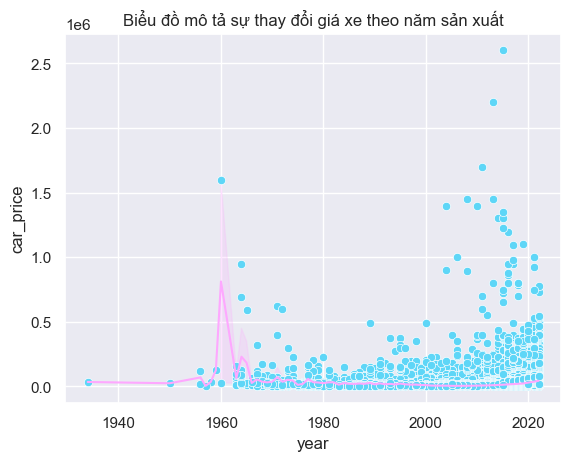

In [127]:
sns.set(style="darkgrid")

# Vẽ biểu đồ phân tán và đường trên cùng một trục
sns.lineplot(x="year", y="car_price", data=dataframe,color='#fea8ff')
sns.scatterplot(x="year", y="car_price", data=dataframe ,color='#5ed6f7')

# Đặt tiêu đề cho biểu đồ
plt.title("Biểu đồ mô tả sự thay đổi giá xe theo năm sản xuất")

# Hiển thị biểu đồ
plt.show()

## Fuel type

In [128]:
fuel_type_percentage=dataframe['fuel_type'].value_counts(normalize=True)*100


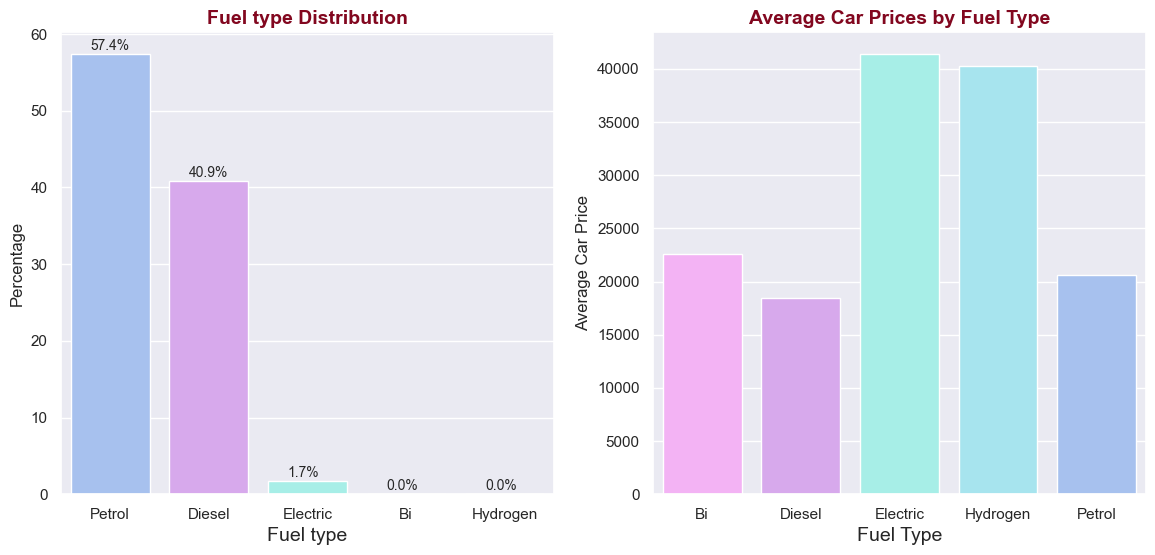

In [129]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
clrs = {'Bi':'#fea8ff','Diesel':'#db9ef7','Electric':'#9bfaf0','Hydrogen':'#9becfa','Petrol':'#9bbefa'}
# Vẽ biểu đồ cột
sns.barplot(x=fuel_type_percentage.index, y=fuel_type_percentage.values,ax=axes[0],palette=clrs)

# Đặt tên cho trục x, y và tiêu đề biểu đồ
axes[0].set_xlabel("Fuel type", fontsize=14)
axes[0].set_ylabel('Percentage')
axes[0].set_title('Fuel type Distribution',fontsize=14, fontweight='bold', fontdict={'color':'#82071f'})

# Định dạng để hiển thị phần trăm trên từng cột
for i, v in enumerate(fuel_type_percentage):
    axes[0].text(i-0.2, v+0.5, f'{v:.1f}%', fontsize=10)
# Tạo DataFrame cho biểu đồ
avg_price = dataframe.groupby('fuel_type')['car_price'].mean().reset_index()

# Vẽ biểu đồ cột
sns.barplot(x='fuel_type', y='car_price', data=avg_price, palette=clrs)

# Đặt tiêu đề và trục tọa độ
axes[1].set_title('Average Car Prices by Fuel Type', fontsize=14 , fontweight='bold', fontdict={'color':'#82071f'})
axes[1].set_xlabel('Fuel Type', fontsize=14)
axes[1].set_ylabel('Average Car Price')

# Hiển thị biểu đồ
plt.show()

## Car brand (distribution by top 10 car brands)

In [130]:
# Tạo top 10 car brands dataframe
brand_counts = dataframe['car_brand'].value_counts()
top_brands = brand_counts.head(10)
df_top_brands = dataframe[dataframe['car_brand'].isin(top_brands.index)]

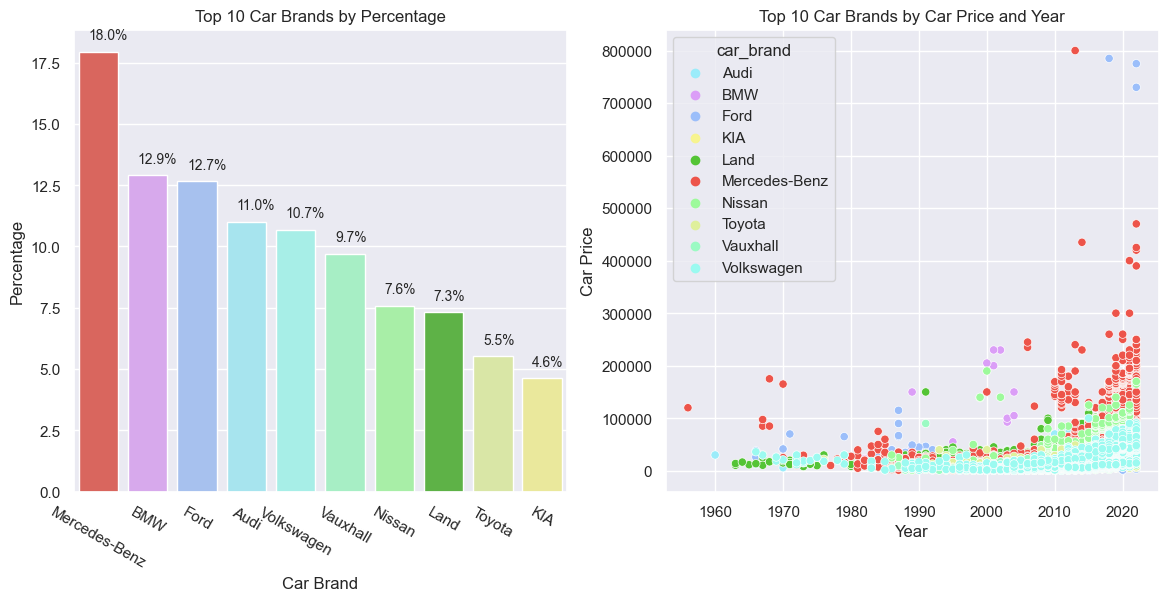

In [131]:

# Tạo figure mới với hai axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
clrs = {'Mercedes-Benz': '#ed544a', 'BMW': '#db9ef7', 'Ford': '#9bbefa', 'Audi': '#9becfa','Volkswagen' :'#9bfaf0','Vauxhall':'#9bfac3' ,'Nissan':'#9dfa9b','Land':'#54c435','Toyota':'#dff09c','KIA':'#f7f48f'}
brand_percentages = df_top_brands['car_brand'].value_counts(normalize=True) * 100
# Vẽ biểu đồ cột trên axes đầu tiên
sns.barplot(x=brand_percentages.index, y=brand_percentages.values, ax=axes[0], palette=clrs)

# Đặt tên cho trục x, y và tiêu đề biểu đồ cột
axes[0].set_xlabel('Car Brand')
axes[0].set_ylabel('Percentage')
axes[0].set_title('Top 10 Car Brands by Percentage')

# Định dạng để hiển thị phần trăm trên từng cột
for i, v in enumerate(brand_percentages):
    axes[0].text(i-0.2, v+0.5, f'{v:.1f}%', fontsize=10)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-30)

# Vẽ biểu đồ scatter trên axes thứ hai
sns.scatterplot(x='year', y='car_price', hue='car_brand', data=df_top_brands, ax=axes[1], palette=clrs)

# Đặt tên cho trục x, y và tiêu đề biểu đồ scatter
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Car Price')
axes[1].set_title('Top 10 Car Brands by Car Price and Year')

# Hiển thị biểu đồ
plt.show()

## Transmission

In [132]:
fuel_type_percentage=dataframe['transmission'].value_counts(normalize=True)*100

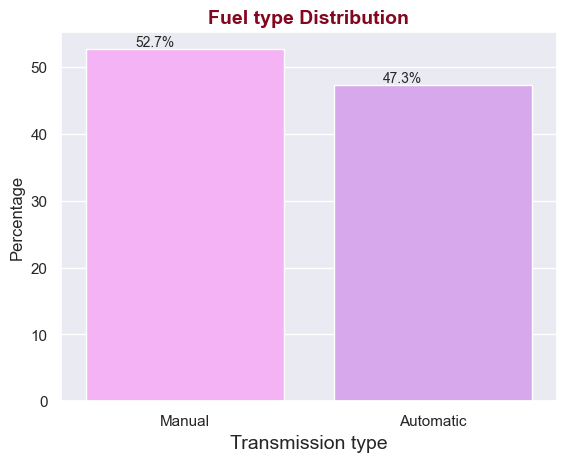

In [133]:

clrs = {'Manual':'#fea8ff','Automatic':'#db9ef7'}
sns.barplot(x=fuel_type_percentage.index, y=fuel_type_percentage.values,palette=clrs)

# Đặt tên cho trục x, y và tiêu đề biểu đồ
plt.xlabel("Transmission type", fontsize=14)
plt.ylabel('Percentage')
plt.title('Fuel type Distribution',fontsize=14, fontweight='bold', fontdict={'color':'#82071f'})

# Định dạng để hiển thị phần trăm trên từng cột
for i, v in enumerate(fuel_type_percentage):
    plt.text(i-0.2, v+0.5, f'{v:.1f}%', fontsize=10)


plt.show()

Tổng số lượng xe sử dụng 2 loại hộp số không chênh nhau quá lớn , điều này sẽ giảm bớt sự mất cân bằng trong data

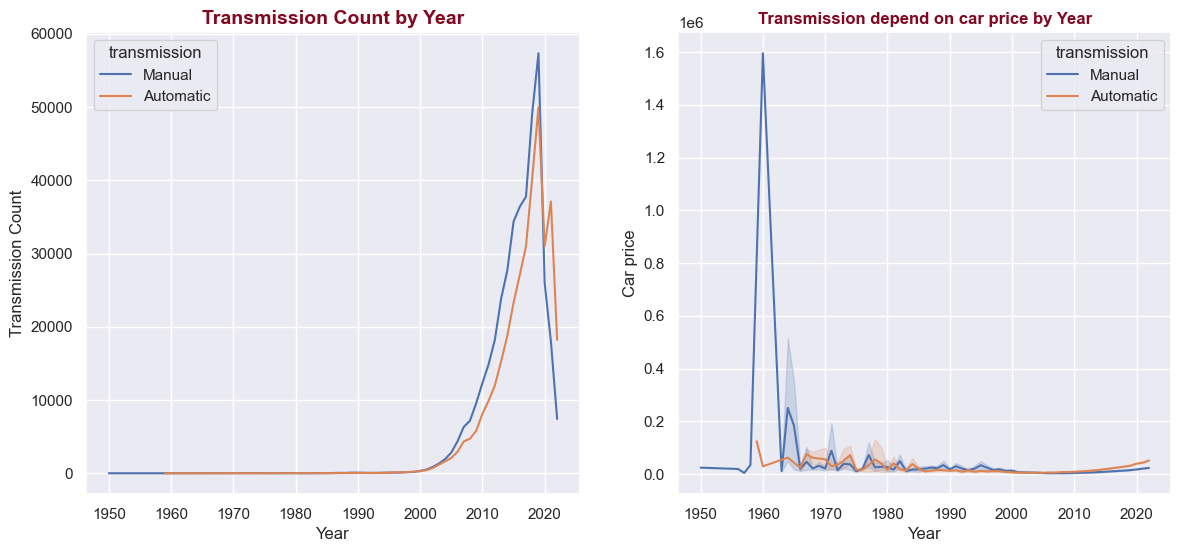

In [134]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
data = dataframe.groupby(['year', 'transmission'])['transmission'].count().reset_index(name='count')
sns.lineplot(x='year', y='count', hue='transmission', data=data ,ax = axes[0])

# Đặt tiêu đề và trục tọa độ
axes[0].set_title('Transmission Count by Year',fontsize=14, fontweight='bold', fontdict={'color':'#82071f'})
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Transmission Count')


sns.lineplot(x='year', y='car_price', hue='transmission', data=dataframe,ax = axes[1])

# Đặt tiêu đề và trục tọa độ
axes[1].set_title('Transmission depend on car price by Year', fontweight='bold', fontdict={'color':'#82071f'})
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Car price')

# Hiển thị biểu đồ
plt.show()


Từ biểu đồ trên , ta có thể kết luận rằng việc sử dụng hộp số tự động đang trở nên phổ biến và ưa chuộng hơn so với hộp số tay cầm,và giá thành của chúng không có sự chênh lệch quá lớn trong vòng vài năm đổ lại 

## Describe summary of data frame 

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818456 entries, 0 to 818455
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   car_price              818456 non-null  int64  
 1   car_title              818456 non-null  object 
 2   car_sub_title          817909 non-null  object 
 3   car_attention_grabber  738163 non-null  object 
 4   car_seller             818348 non-null  object 
 5   car_seller_rating      644191 non-null  float64
 6   car_seller_location    816256 non-null  object 
 7   year                   747436 non-null  float64
 8   reg                    747436 non-null  object 
 9   engine_size            803010 non-null  float64
 10  transmission           818243 non-null  object 
 11  ulez                   818456 non-null  int64  
 12  full_dealership        818456 non-null  int64  
 13  discounted             818456 non-null  float64
 14  fuel_type              818234 non-nu

## Handling missing values (second way)

Get all columns that have missing values

In [136]:
dataframe.columns[dataframe.isna().any()].tolist()

['car_sub_title',
 'car_attention_grabber',
 'car_seller',
 'car_seller_rating',
 'car_seller_location',
 'year',
 'reg',
 'engine_size',
 'transmission',
 'fuel_type',
 'car_type',
 'num_owners',
 'miles_traveled',
 'power',
 'title']

In [137]:
train_missings = dataframe.filter(
['car_sub_title',
 'car_attention_grabber',
 'car_seller',
 'car_seller_rating',
 'car_seller_location',
 'year',
 'reg',
 'engine_size',
 'transmission',
 'fuel_type',
 'car_type',
 'num_owners',
 'miles_traveled',
 'power',
 'title'],axis=1)

In [138]:
null_percentages = train_missings.isnull().mean() * 100

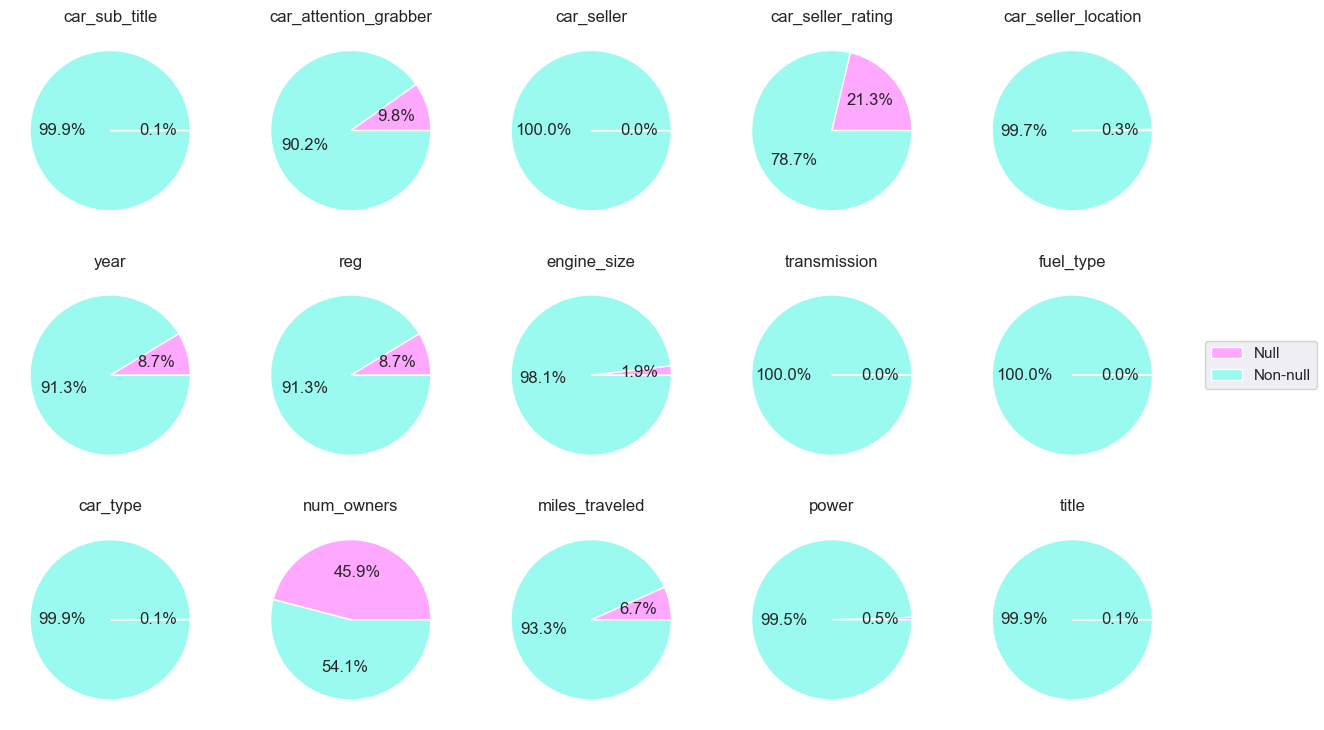

In [139]:
not_null_percentages = 100 - null_percentages
# Vẽ 15 biểu đồ trên 3 hàng, mỗi hàng chứa 5 biểu đồ
fig, ax = plt.subplots(3, 5, figsize=(15, 9))
color=['#fea8ff','#9bfaf0']
# Vẽ biểu đồ tròn cho mỗi cột
for i, col in enumerate(train_missings.columns):
    ax_i = ax[i//5, i%5]  # Chọn vị trí của Axes trong mảng
    ax_i.pie([null_percentages[col], not_null_percentages[col]], autopct='%1.1f%%' ,colors=color)
    ax_i.set_title(col)
fig.legend(['Null', 'Non-null'], loc='center right')
plt.show()

Fill missing category values with UnKnown

In [6]:
dataframe['car_seller'] = dataframe['car_seller'].fillna('UnKnown')
dataframe['car_seller_location'] = dataframe['car_seller_location'].fillna('UnKnown')
dataframe['fuel_type'] = dataframe['fuel_type'].fillna('UnKnown')
dataframe['car_sub_title'] = dataframe['car_sub_title'].fillna('UnKnown')
dataframe['transmission'] = dataframe['transmission'].fillna('UnKnown')
dataframe['car_type'] = dataframe['car_type'].fillna('UnKnown')
dataframe['car_attention_grabber'] = dataframe['car_attention_grabber'].fillna('UnKnown')
dataframe['reg'] = dataframe['reg'].fillna('UnKnown')
dataframe['title'] = dataframe['title'].fillna('UnKnown')

We will assign some columns their proper datatype.

In [7]:
dataframe[['car_seller', 'car_seller_location', 'fuel_type', 'car_sub_title', 'transmission', 'car_type', 'car_title', 'car_attention_grabber', 'reg', 'service', 'accident_type' ,'title' ]] = dataframe[['car_seller', 'car_seller_location', 'fuel_type', 'car_sub_title', 'transmission', 'car_type', 'car_title', 'car_attention_grabber', 'reg', 'service', 'accident_type' ,'title' ]].astype('category')

dataframe[['approve_used', 'new_brand', 'finance', 'ulez', 'full_dealership', 'warranty', 'first_year_tax']] = dataframe[['approve_used', 'new_brand', 'finance', 'ulez', 'full_dealership', 'warranty', 'first_year_tax']].astype('bool')

dataframe['year'] = dataframe['year'].astype('Int64')
dataframe['num_owners'] = dataframe['num_owners'].astype('Int64')

In [8]:
dataframe.columns

Index(['car_price', 'car_title', 'car_sub_title', 'car_attention_grabber',
       'car_seller', 'car_seller_rating', 'car_seller_location', 'year', 'reg',
       'engine_size', 'transmission', 'ulez', 'full_dealership', 'discounted',
       'fuel_type', 'car_type', 'num_owners', 'miles_traveled', 'power',
       'service', 'warranty', 'first_year_tax', 'accident_type', 'new_brand',
       'approve_used', 'finance', 'title'],
      dtype='object')

Check dataframe after assigning

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818456 entries, 0 to 818455
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   car_price              818456 non-null  int64   
 1   car_title              818456 non-null  category
 2   car_sub_title          818456 non-null  category
 3   car_attention_grabber  818456 non-null  category
 4   car_seller             818456 non-null  category
 5   car_seller_rating      644191 non-null  float64 
 6   car_seller_location    818456 non-null  category
 7   year                   747436 non-null  Int64   
 8   reg                    818456 non-null  category
 9   engine_size            803010 non-null  float64 
 10  transmission           818456 non-null  category
 11  ulez                   818456 non-null  bool    
 12  full_dealership        818456 non-null  bool    
 13  discounted             818456 non-null  float64 
 14  fuel_type           

Build model to fill missing values

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical features
label_encoder = LabelEncoder()
cat_features = dataframe.select_dtypes(include=['category']).columns
df_encoded = dataframe[cat_features].apply(label_encoder.fit_transform)
df_encoded = pd.concat([df_encoded, dataframe.select_dtypes(include=['bool', 'Int64', 'float64'])], axis=1)

Build model to fill missing values of engine_size

In [14]:
# Select rows that have engine_size is not null
data = df_encoded.dropna(subset=['engine_size'])
# Encode categorical features
#X_encoded = X.apply(label_encoder.fit_transform)
# Select features and target variable
X = data[['car_type', 'fuel_type', 'car_title', 'car_sub_title', 'transmission', 'car_attention_grabber']]
y = data['engine_size']

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize model
engine_size_model = DecisionTreeRegressor()
# Train model
engine_size_model.fit(X_train, y_train)
# Evaluate model
engine_size_model.score(X_test, y_test)

0.9923738360405523

Fill missing values of engine_size

In [15]:
# Select rows that have engine_size is null
missing_rows = dataframe['engine_size'].isnull()

# Select features and target variable for missing rows
X_missing = dataframe.loc[missing_rows, ['car_type', 'fuel_type', 'car_title', 'car_sub_title', 'transmission', 'car_attention_grabber']]
# Encode categorical features
X_missing_encoded = X_missing.apply(label_encoder.fit_transform)
# Predict missing values
engine_size_pred = engine_size_model.predict(X_missing_encoded)
# Fill missing values

dataframe.loc[dataframe['engine_size'].isnull(), 'engine_size'] = engine_size_pred

Build model to fill missing values of power

In [16]:
# Select rows that have power is not null
data = df_encoded.dropna(subset=['power'])
# Select features and target variable
X = data[['car_type', 'fuel_type', 'car_title', 'car_sub_title', 'transmission', 'car_attention_grabber']]
y = data['power']
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize model
power_model = DecisionTreeRegressor()
# Train model
power_model.fit(X_train, y_train)
# Evaluate model
power_model.score(X_test, y_test)

0.9898511834832969

Fill missing values of power

In [17]:
# Select rows that have power is null
missing_rows = dataframe['power'].isnull()

# Select features and target variable for missing rows
X_missing = dataframe.loc[missing_rows, ['car_type', 'fuel_type', 'car_title', 'car_sub_title', 'transmission', 'car_attention_grabber']]

# Encode categorical features
X_missing_encoded = X_missing.apply(label_encoder.fit_transform)

# Predict missing values
power_pred = power_model.predict(X_missing_encoded)

# Fill missing values
dataframe.loc[dataframe['power'].isnull(), 'power'] = power_pred

Build model to fill missing values of year

In [18]:
# Select rows that have year is not null
data = df_encoded.dropna(subset=['year'])
# Select features and target variable
X = data[['car_type', 'fuel_type', 'car_title', 'car_sub_title', 'transmission', 'car_attention_grabber', 'car_seller', 'car_seller_location', 'reg']]
y = data['year']
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize model
year_model = DecisionTreeRegressor()
# Train model
year_model.fit(X_train, y_train)
# Evaluate model
year_model.score(X_test, y_test)

0.9845735067566027

Fill missing values of year

In [19]:
# Select rows that have year is null
missing_rows = dataframe['year'].isnull()

# Select features and target variable for missing rows
X_missing = dataframe.loc[missing_rows, ['car_type', 'fuel_type', 'car_title', 'car_sub_title', 'transmission', 'car_attention_grabber', 'car_seller', 'car_seller_location', 'reg']]

# Encode categorical features
X_missing_encoded = X_missing[X_missing.select_dtypes(include=['category']).columns].apply(label_encoder.fit_transform)
X_missing_encoded = pd.concat([X_missing_encoded, X_missing.select_dtypes(exclude=['category'])], axis=1)

# Predict missing values
year_pred = year_model.predict(X_missing_encoded)

# Fill missing values
dataframe.loc[dataframe['year'].isnull(), 'year'] = year_pred

Build model to fill missing values of miles_traveled

In [20]:
# Select rows that have miles_traveled is not null
data = df_encoded.dropna(subset=['miles_traveled', 'year', 'power', 'engine_size'])
# Select features and target variable
X = data[['car_type', 'fuel_type', 'transmission', 'car_seller', 'car_seller_location', 'reg', 'year','power','warranty', 'engine_size']]
y = data['miles_traveled']
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize model
miles_traveled_model = DecisionTreeRegressor()
# Train model
miles_traveled_model.fit(X_train, y_train)
# Evaluate model
miles_traveled_model.score(X_test, y_test)

0.801755961045975

Fill missing values of miles_traveled

In [21]:
# Select rows that have miles_traveled is null
missing_rows = dataframe['miles_traveled'].isnull()

# Select features and target variable for missing rows
X_missing = dataframe.loc[missing_rows, ['car_type', 'fuel_type', 'transmission', 'car_seller', 'car_seller_location', 'reg', 'year','power','warranty', 'engine_size']]

# Encode categorical features for missing rows
X_missing_encoded = X_missing[X_missing.select_dtypes(include=['category']).columns].apply(label_encoder.fit_transform)
X_missing_encoded = pd.concat([X_missing_encoded, X_missing.select_dtypes(exclude=['category'])], axis=1)

# Predict missing values
miles_traveled_pred = miles_traveled_model.predict(X_missing_encoded)

# Fill missing values
dataframe.loc[missing_rows, 'miles_traveled'] = miles_traveled_pred

Build model to fill missing values of car_seller_rating

In [22]:
# Select rows that have car_seller_rating is not null
data = df_encoded.dropna(subset=['car_seller_rating', 'car_seller_location', 'service', 'discounted', 'car_seller', 'approve_used'])
# Select features and target variable
X = data[['car_seller_location', 'service', 'discounted', 'car_seller', 'approve_used']]
y = data['car_seller_rating']
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize model
car_seller_rating_model = DecisionTreeRegressor()
# Train model
car_seller_rating_model.fit(X_train, y_train)
# Evaluate model
car_seller_rating_model.score(X_test, y_test)

0.9876105065282413

Fill missing values of car_seller_rating

In [23]:
# Select rows that have car_seller_rating is null
missing_rows = dataframe['car_seller_rating'].isnull()

# Select features and target variable for missing rows
X_missing = dataframe.loc[missing_rows, ['car_seller_location', 'service', 'discounted', 'car_seller', 'approve_used']]

# Encode categorical features for missing rows
X_missing_encoded = X_missing.apply(label_encoder.fit_transform)

# Predict missing values
car_seller_rating_pred = car_seller_rating_model.predict(X_missing_encoded)

# Fill missing values
dataframe.loc[missing_rows, 'car_seller_rating'] = car_seller_rating_pred

We will drop title and num_owners since car_title and car_sub_title contain all needed infomations of title  and num_owners miss too much values

In [ ]:
dataframe.drop(['title', 'num_owners'], axis=1, inplace=True)

In [28]:
print("Number of columns that have NaN values are : " + str(len(dataframe.columns[dataframe.isna().any()].tolist())))

Number of columns that have NaN values are : 0


## Handling outliers

We need to find all the columns that could contain outliers

In [95]:
dataframe.select_dtypes(include=['int', 'float']).columns.tolist()


['car_price',
 'car_seller_rating',
 'year',
 'engine_size',
 'ulez',
 'full_dealership',
 'discounted',
 'miles_traveled',
 'power',
 'warranty',
 'first_year_tax',
 'new_brand',
 'approve_used',
 'finance']

In [96]:
train_outliers = dataframe.filter( [
 'car_seller_rating',
 'year',
 'engine_size',
 'discounted',
 'miles_traveled',
 'power'],axis=1)

We will remove all rows that contain outliers

In [97]:
for col in train_outliers:
    q1 = train_outliers[col].quantile(0.25)
    q3 = train_outliers[col].quantile(0.75)
    iqr = q3 - q1
    range_low = q1 - 1.5 * iqr
    range_high = q3 + 1.5 * iqr
    outliers = dataframe[(dataframe[col] < range_low) | (dataframe[col] > range_high)]
    print("NUmber of outliers in " + str(col) + " is : " + str(len(outliers)))
    

NUmber of outliers in car_seller_rating is : 54602
NUmber of outliers in year is : 18811
NUmber of outliers in engine_size is : 83807
NUmber of outliers in discounted is : 0
NUmber of outliers in miles_traveled is : 8337
NUmber of outliers in power is : 54812


Display the distribution of values in each column of a dataset and highlight outliers by boxplot chart

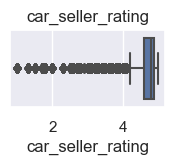

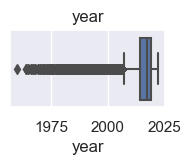

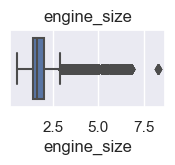

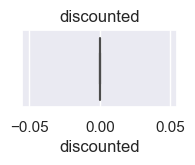

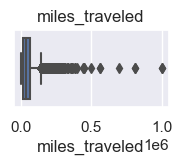

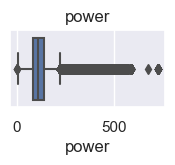

In [99]:

for col in train_outliers:
    plt.figure(figsize=(2,1))
    sns.boxplot(x=dataframe[col], whis=1.5)
    plt.title(col)
    plt.show()

Replace all outliers

In [105]:
for col in train_outliers:
    q1 = train_outliers[col].quantile(0.25)
    q3 = train_outliers[col].quantile(0.75)
    iqr = q3 - q1
    range_low = q1 - 1.5 * iqr
    range_high = q3 + 1.5 * iqr
    dataframe = dataframe[(dataframe[col] >= range_low) & (dataframe[col] <= range_high)]
    outliers = dataframe[(dataframe[col] < range_low) | (dataframe[col] > range_high)]
    print("NUmber of outliers in " + str(col) + " is : " + str(len(outliers)))

NUmber of outliers in car_seller_rating is : 0
NUmber of outliers in year is : 0
NUmber of outliers in engine_size is : 0
NUmber of outliers in discounted is : 0
NUmber of outliers in miles_traveled is : 0
NUmber of outliers in power is : 0


Display the distribution of values in each column of a dataset and highlight outliers by boxplot chart after replaced all outliers

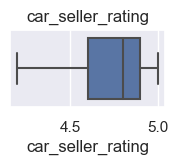

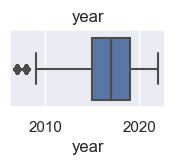

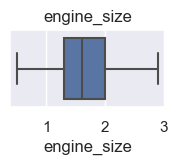

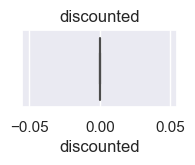

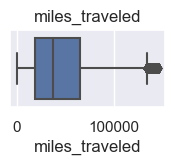

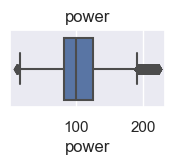

In [106]:
for col in train_outliers:
    plt.figure(figsize=(2,1))
    sns.boxplot(x=dataframe[col], whis=1.5)
    plt.title(col)
    plt.show()

Checking the data after removing outliers

In [107]:
dataframe.shape

(552846, 25)

## Encoding labels

Get all columns that contain object-type values

In [108]:
encoding_col = dataframe.select_dtypes(include=['category','bool'])
encoding_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 552846 entries, 8 to 818103
Empty DataFrame


Encoding all object-type then recheck

In [109]:
le = LabelEncoder()
for col in encoding_col:
    le.fit(encoding_col[col].astype(str))
    dataframe[col] = le.transform(encoding_col[col].astype(str))



In [110]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 552846 entries, 8 to 818103
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   car_price              552846 non-null  int64  
 1   car_title              552846 non-null  object 
 2   car_attention_grabber  552846 non-null  object 
 3   car_seller             552846 non-null  object 
 4   car_seller_rating      552846 non-null  float64
 5   car_seller_location    552846 non-null  object 
 6   year                   552846 non-null  float64
 7   reg                    552846 non-null  object 
 8   engine_size            552846 non-null  float64
 9   transmission           552846 non-null  object 
 10  ulez                   552846 non-null  int64  
 11  full_dealership        552846 non-null  int64  
 12  discounted             552846 non-null  float64
 13  fuel_type              552846 non-null  object 
 14  car_type               552846 non-null  o

## Choose appopriate columns

Fetching heatmap figure

Text(0.5, 1.0, 'Correlation between the columns')

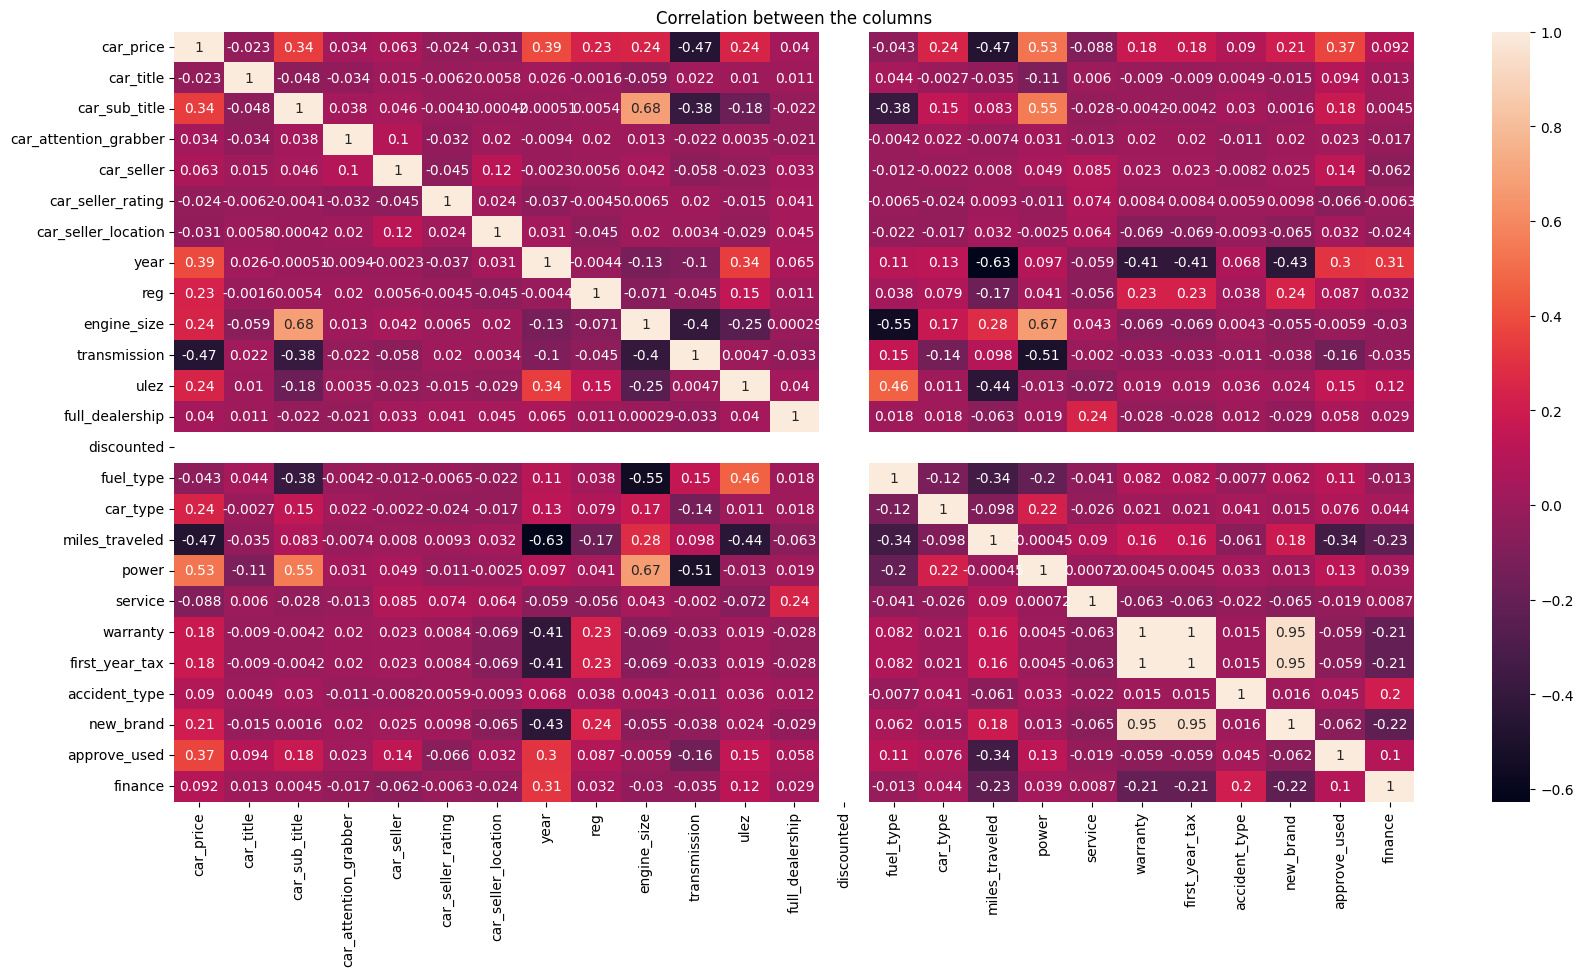

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(dataframe.corr(),annot=True)
plt.title("Correlation between the columns")

In [48]:
corr_matrix = dataframe.corr()['car_price']

Get top 15 features that will be used for the regressions models

In [49]:
top_10_cols = corr_matrix.abs().nlargest(16).iloc[1:].index

In [50]:
y = dataframe['car_price'].values

In [51]:
dataframe = dataframe.drop(columns=dataframe.columns.difference(top_10_cols))
dataframe['car_price'] = y

In [52]:
dataframe.columns

Index(['car_sub_title', 'year', 'reg', 'engine_size', 'transmission', 'ulez',
       'car_type', 'miles_traveled', 'power', 'warranty', 'first_year_tax',
       'accident_type', 'new_brand', 'approve_used', 'finance', 'car_price'],
      dtype='object')

## Splitting data into train and test

In [53]:
y = dataframe['car_price']
X = dataframe.drop(columns=['car_price'],axis=1)

y.head()

8     24275
9     24275
11    15649
12    15995
14    16199
Name: car_price, dtype: int64

In [54]:
# 60% train ,20% validation ,20% test 
X_train_or, X_test, y_train_or, y_test = train_test_split(X, y, test_size=0.4 , random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train_or, y_train_or, test_size=0.2, random_state = 42)
print(X_train.shape)
print(y_val.shape)


(283651, 15)
(70913,)


In [55]:
X_train.head()

,car_sub_title,year,reg,engine_size,transmission,ulez,car_type,miles_traveled,power,warranty,first_year_tax,accident_type,new_brand,approve_used,finance
305173,42946,2022,20,1.6,0,1,11,4028.0,103.7055,0,0,4,0,0,1
578580,13787,2019,17,1.2,1,1,11,14953.0,96.3505,0,0,4,0,0,0
219822,31003,2020,40,1.5,1,1,11,16966.0,88.2600,0,0,4,0,0,1
604696,36134,2010,8,1.5,1,0,7,70000.0,77.2275,0,0,4,0,0,1
208422,48254,2015,34,1.6,0,1,6,70564.0,91.9375,0,0,4,0,0,1


# Training the model

Bulding function needed to get metrics for val set

In [56]:
def get_metrics(model):
    print(f'Train score {model.score(X_train, y_train)}')
    print(f'Val score {r2_score(y_test,model.predict(X_test) )}')
    print("MAE:" , metrics.mean_absolute_error(y_test,model.predict(X_test)))
    print("MSE:" , metrics.mean_squared_error(y_test,model.predict(X_test)))
    print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,model.predict(X_test))))
    



## Basic Linear Regression

In [57]:
lr = LinearRegression()
lr.fit(X_train, y_train)
score = lr.score(X_val, y_val)
get_metrics(lr)

Train score 0.6481628272087601
Val score 0.713371398172775
MAE: 3569.200733797531
MSE: 30714300.638002917
RMSE: 5542.048415342735


## Lasso

In [58]:
ls = Lasso()
ls.fit(X_train, y_train)
get_metrics(ls)

Train score 0.6481446413359551
Val score 0.7133323811338841
MAE: 3569.0825053939266
MSE: 30718481.592223313
RMSE: 5542.425605474855


## Ridge

In [59]:
rd = Ridge()
rd.fit(X_train, y_train)
get_metrics(rd)

Train score 0.6481627119516342
Val score 0.7133701554671996
MAE: 3569.2005512448663
MSE: 30714433.802775733
RMSE: 5542.060429368822


## Random forest

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, max_depth=15,
                                       n_estimators=100, oob_score=True)

rf.fit(X_train,y_train)
get_metrics(rf)


Train score 0.9479205085928631
Val score 0.880436295566999
MAE: 1521.0421518858448
MSE: 12812104.374573635
RMSE: 3579.4000020357653


## Keras model

In [63]:
from tensorflow import keras

Define the neural network model architecture

In [64]:

kr = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=[10]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

Compile the model with appropriate loss function and optimizer

In [65]:
# Compile the model with appropriate loss function and optimizer
kr.compile(loss='mean_squared_error', optimizer='adam')

Define a callback to show the progress (number of epoch)

In [66]:

class ProgressCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
            print("Epoch {}: loss = {:.4f}".format(epoch, logs['loss']))

Train the model on the training data

In [67]:

kr.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, callbacks=[ProgressCallback()])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

Use the trained model to make predictions on the testing data

In [156]:

predictions = kr.predict(X_val)

ValueError: in user code:

    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 15)


In [109]:
print(f'Train score {r2_score(y_train,kr.predict(X_train) )}')
print(f'Val score {r2_score(y_val, predictions)}')
print("MAE:" , metrics.mean_absolute_error(y_val,kr.predict(X_val)))
print("MSE:" , metrics.mean_squared_error(y_val,kr.predict(X_val)))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_val,kr.predict(X_val))))

ValueError: in user code:

    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 15)
